In [50]:
# using Plots 
using Images

In [90]:
function pixelGrid(res=64)
    m=collect(Iterators.product(-1.0:2.0/(res-1):1.0, -1:2.0/(res-1):1.0))[:] #equivilant to meshgrid
    m=reshape(collect(Iterators.flatten(m)),2,length(m))
    return m
end

pixelGrid (generic function with 2 methods)

In [91]:
function circle(resolution=64,radius=1,thresholded=true)
    pixels = pixelGrid(resolution);
    X=pixels[1,:];
    Y=pixels[2,:];
    frep1= ((radius).*(radius).-((X.-(0)).*(X.-(0)).+(Y.-(0)).*(Y.-(0))));
    if thresholded
        frep1[frep1.<0.5].=0.0;
        frep1[frep1.>=0.5].=1.0;
    end
    return reshape(frep1,resolution,resolution)
end

circle (generic function with 4 methods)

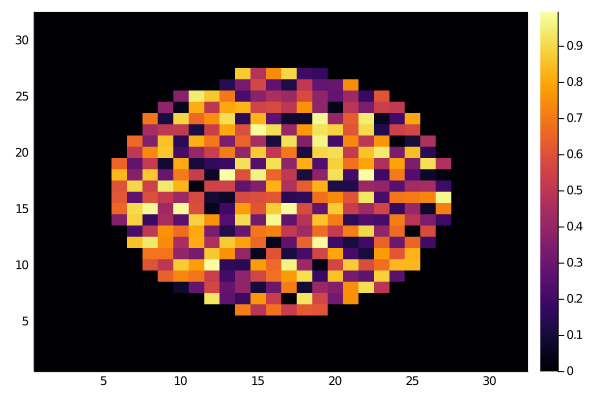

In [100]:
resolution=32
thresholded=true
radius=1
target=circle(resolution,radius,thresholded)
f=target.*rand(resolution,resolution)
heatmap(f)
# fileName="./target_julia.png"
# save(fileName, maximum(target).-target)


In [105]:
function lossFunction(im,frep1)
    return sum(abs.(im.-frep1))/length(im)
end

lossFunction (generic function with 1 method)

In [107]:
lossFunction(target,target)

0.0

1024